#### Задание 1
1.1 Импортируйте библиотеки pandas, numpy и matplotlib.

1.2 Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

1.3 Создайте датафреймы X и y из этих данных.

1.4 Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

1.5 Масштабируйте данные с помощью StandardScaler.

1.6 Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42

1.7 Постройте диаграмму рассеяния на этих данных.

In [1]:
#1.1
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#1.2
from sklearn.datasets import load_boston

boston = load_boston()
boston_data = boston['data']
boston_feature_names = boston['feature_names']
boston_target = boston['target']

X = pd.DataFrame(boston_data, columns=boston_feature_names)
y = boston_target

In [3]:
#1.3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#1.4 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
#1.5
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'Before: {X_train_scaled.shape}')
print(f'After: {X_train_tsne.shape}')

Before: (404, 13)
After: (404, 2)


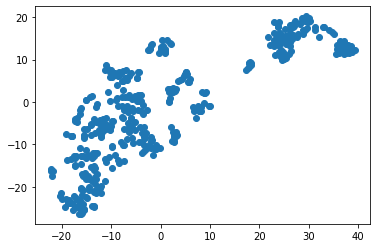

In [6]:
#1.6
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
2.1 С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.

2.2 Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

2.3 Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
#2.1
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

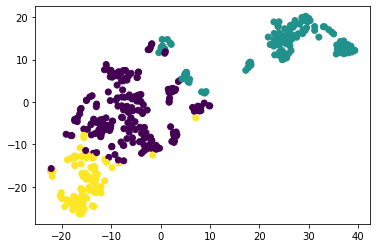

In [8]:
#2.2
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

cluster_0 mean price: 24.958115183246072
cluster_1 mean price: 16.165354330708663
cluster_2 mean price: 27.78837209302326


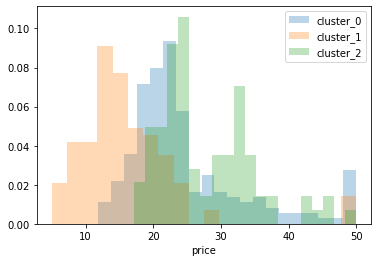

In [9]:
#2.3.1
print(f'cluster_0 mean price: {y_train[labels_train == 0].mean()}')
print(f'cluster_1 mean price: {y_train[labels_train == 1].mean()}')
print(f'cluster_2 mean price: {y_train[labels_train == 2].mean()}')

plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.3)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.3)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.3)

plt.legend(['cluster_0', 'cluster_1', 'cluster_2'])
plt.xlabel('price')

plt.show()

cluster_0 CRIM: 0.42166020942408367
cluster_1 CRIM: 10.797028425196853
cluster_2 CRIM: 0.07356558139534886


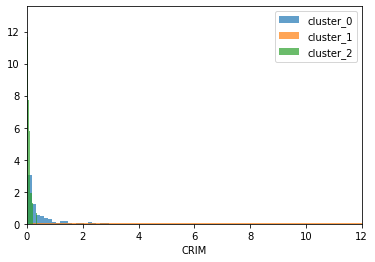

In [10]:
#2.3.2
print(f'cluster_0 CRIM: {X_train.loc[labels_train == 0, "CRIM"].mean()}')
print(f'cluster_1 CRIM: {X_train.loc[labels_train == 1, "CRIM"].mean()}')
print(f'cluster_2 CRIM: {X_train.loc[labels_train == 2, "CRIM"].mean()}')

plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.7)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.7)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.7)

plt.xlim(0, 12)
plt.legend(['cluster_0', 'cluster_1', 'cluster_2'])
plt.xlabel('CRIM')

plt.show()

#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

labels_test = kmeans.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [12]:
#cluster_0
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.721524042313201

In [13]:
#cluster_1
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.5231397590833383

In [14]:
#cluster_2
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(y_test[labels_test == 2], y_test_pred_2)

0.915516197205082

In [15]:
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])

r2_score(y_test_all, y_test_pred_all)

0.7955104919189295

cluster_0 mean price: 21.860784313725492
cluster_1 mean price: 16.43714285714286
cluster_2 mean price: 31.35


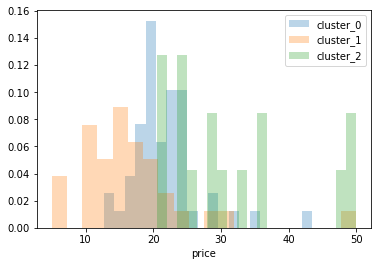

In [16]:
print(f'cluster_0 mean price: {y_test[labels_test == 0].mean()}')
print(f'cluster_1 mean price: {y_test[labels_test == 1].mean()}')
print(f'cluster_2 mean price: {y_test[labels_test == 2].mean()}')

plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.3)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.3)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.3)

plt.legend(['cluster_0', 'cluster_1', 'cluster_2'])
plt.xlabel('price')

plt.show()

cluster_0 CRIM: 0.26607882352941176
cluster_1 CRIM: 10.165531142857143
cluster_2 CRIM: 0.062060000000000004


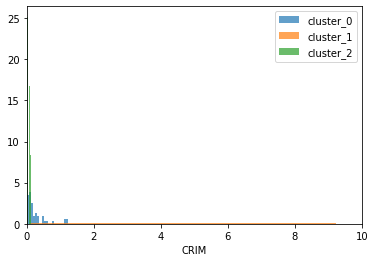

In [17]:
print(f'cluster_0 CRIM: {X_test.loc[labels_test == 0, "CRIM"].mean()}')
print(f'cluster_1 CRIM: {X_test.loc[labels_test == 1, "CRIM"].mean()}')
print(f'cluster_2 CRIM: {X_test.loc[labels_test == 2, "CRIM"].mean()}')

plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.7)
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=20, density=True, alpha=0.7)
plt.hist(X_test.loc[labels_test == 2, 'CRIM'], bins=20, density=True, alpha=0.7)

plt.xlim(0, 10)
plt.legend(['cluster_0', 'cluster_1', 'cluster_2'])
plt.xlabel('CRIM')

plt.show()